In [2]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import astropy
from astropy.table import Table

In [61]:
def tname(i):
    path = '/home/raulteixeira/repos/CSPZ/scripts/tile_DR3_1_1.csv'
    metadata = np.genfromtxt(path, dtype='str', delimiter=",")[1:][int(i)]
    tilename = metadata[0][2:-1]
    return tilename

DES1157-0624
Z_MEAN


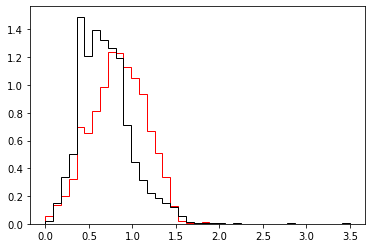

Z_B


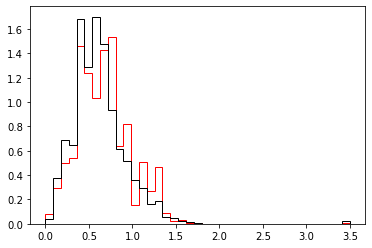

DES1157-0624, templates used [1. 2. 3. 4. 5. 6. 7. 8.]
Z_SAMP


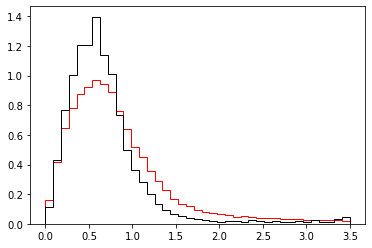

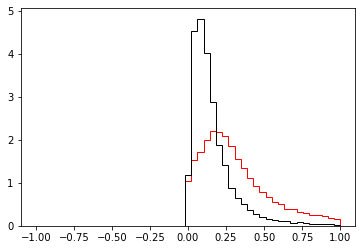

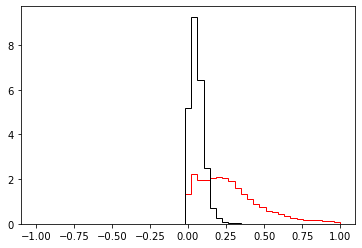

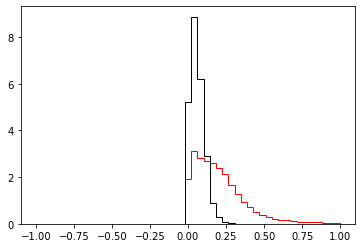

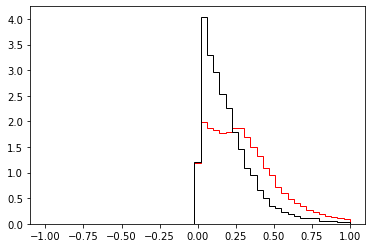

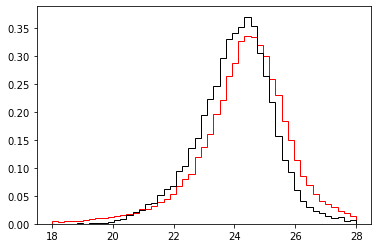

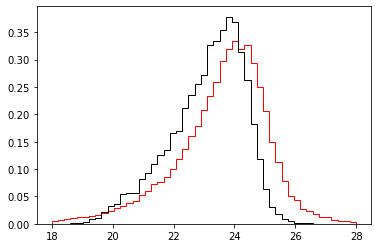

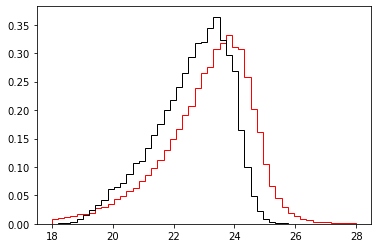

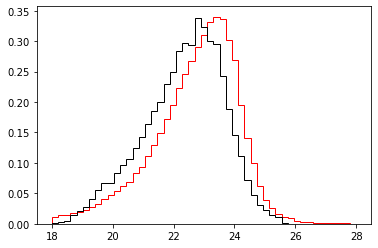

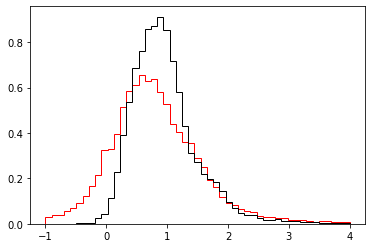

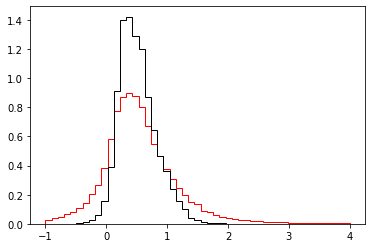

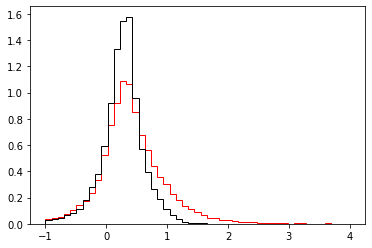

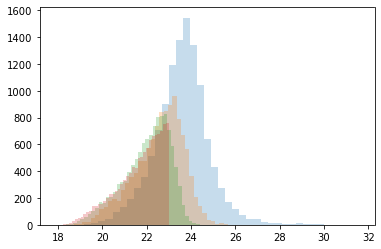

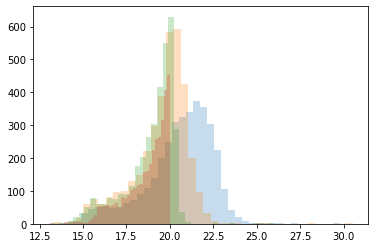

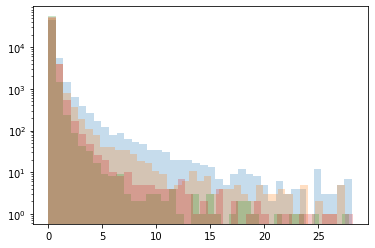

maskless below


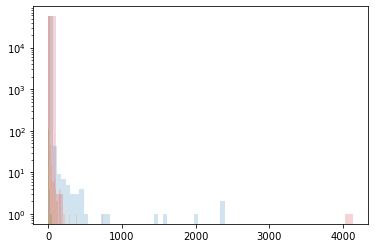

In [62]:
tileno = 0
tilename = tname(0)

tilename = tname(tileno)
print(tilename)

bands = ['g', 'r', 'i', 'z']
flag_masks = []
for band in bands:
    filename = f'/home/raulteixeira/scratch-midway2/CosmicShearData/tile_{tileno}/decade.ncsa.illinois.edu/\
deca_archive/DEC_Taiga/multiepoch/delve/r5918/{tname(tileno)}/p01/cat/{tname(tileno)}_r5918p01_{band}_cat.fits'
    table_band = Table.read(filename)
    mask_i = table_band['FLAGS']==0
    flag_masks.append(mask_i)

maskflag = np.full(mask_i.size, True)
for i in range(4):
    maskflag = np.logical_and(maskflag, flag_masks[i])

filename = f'/home/raulteixeira/scratch-midway2/CosmicShearData/tile_{tileno}/pzout_{tileno}.h5'
with h5py.File(filename) as f:
    bpzres={}
    for key in list(f.keys()):
        bpzres[key] = np.array(f[key])

filename = f'/home/raulteixeira/scratch-midway2/CosmicShearData/tile_{tileno}/table.h5'
with h5py.File(filename) as f:
    photometry={}
    for key in list(f['df'].keys()):
        photometry[key] = np.array(f['df'][key])

filename = '/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/pzinput/pzinput_METACAL_4_bands_DES1212-3540.h5'
with h5py.File(filename) as f:
    photometry_good={}
    for key in list(f['df'].keys()):
        photometry_good[key] = np.array(f['df'][key])

filename = '/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/pzs/pz_hdfn_gen_METACAL4_DES1212-3540_test110822.h5'
with h5py.File(filename) as f:
    bpzgood={}
    for key in list(f.keys()):
        bpzgood[key] = np.array(f[key])

print('Z_MEAN')
plt.hist(bpzres['Z_MEAN'][bpzres['Z_MEAN']>-1], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='r');
plt.hist(bpzgood['Z_MEAN'][bpzgood['Z_MEAN']>-1], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='k');
plt.show()

print('Z_B')
plt.hist(bpzres['Z_B'][bpzres['Z_B']>-1], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='r');
plt.hist(bpzgood['Z_B'][bpzgood['Z_B']>-1], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='k');
plt.show()


print(f'{tilename}, templates used', np.unique(bpzres['T_ML']))

print('Z_SAMP')
plt.hist(bpzres['Z_SAMP'][bpzres['Z_SAMP']>-1], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='r');
plt.hist(bpzgood['Z_SAMP'][bpzgood['Z_SAMP']>-1], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='k');
plt.show()

magdata = photometry['block0_values'].T[8:12]
magerrdata = photometry['block0_values'].T[12:]

magdata_good = photometry_good['block1_values'].T[0:4]
magerrdata_good = photometry_good['block1_values'].T[4:8]

for i in range(4):
    plt.hist(magerrdata[i], bins=np.linspace(-1, 1, 50), histtype = 'step', color='r', density=1)
    plt.hist(magerrdata_good[i], bins=np.linspace(-1, 1, 50), histtype = 'step', color='k', density=1)
    plt.show()

maskierr25 = magerrdata[3]<.25

for i in range(4):
    plt.hist(magdata[i], bins=np.linspace(18, 28, 50), histtype = 'step', color='r', density=1)
    plt.hist(magdata_good[i], bins=np.linspace(18, 28, 50), histtype = 'step', color='k', density=1)
    plt.show()

for i in range(3):
    plt.hist(magdata[i]-magdata[i+1], bins=np.linspace(-1, 4, 50), histtype = 'step', color='r', density=1)
    plt.hist(magdata_good[i]-magdata_good[i+1], bins=np.linspace(-1, 4, 50), histtype = 'step', color='k', density=1)
    plt.show()



i_cut_good = magdata_good[3]<23
for i in range(4):
    magmask_i = magdata_good[i]!=99
    plt.hist(magdata_good[i][np.logical_and(i_cut_good, magmask_i)], bins=40, alpha = .25)
plt.show()

i_cut = magdata[3]<20
for i in range(4):
    magmask_i = magdata[i]!=99
    plt.hist(magdata[i][np.logical_and(i_cut, magmask_i)], bins=40, alpha = .25)
plt.show()

#     plt.hist(bpzres['Z_SAMP'][np.logical_and(maskierr25, bpzres['Z_SAMP']>-1)], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='r');
#     plt.hist(bpzgood['Z_SAMP'][bpzgood['Z_SAMP']>-1], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='k');
#     plt.show()

np.sum(magdata[i]==99)

for i in range(4):
    magmask_i = magdata[i]!=99
    errmaxmask = magerrdata[i]<28.3
    plt.hist(magerrdata[i][np.logical_and(magmask_i, errmaxmask)], bins=40, alpha = .25)
plt.yscale('log')
plt.show()

for i in range(4):
    plt.hist(magerrdata[i], bins=40, alpha = .2)
print('maskless below')
plt.yscale('log')
plt.show()

In [16]:
path = '/project2/chihway/raulteixeira/data/'
pb = np.loadtxt(path+'pb.txt')
p_bayes = np.loadtxt(path+'p_bayes.txt')
p_i = np.loadtxt(path+'p_i.txt')
p = np.loadtxt(path+'p.txt')
f_obs = np.loadtxt(path+'f_obs.txt')
ef_obs = np.loadtxt(path+'ef_obs.txt')
f_mod = np.load(path+'f_mod.npy')
z = np.load(path+'z.npy')

In [ ]:
# np.savetxt(path+'pb.txt', pb)
# np.savetxt(path+'p_bayes.txt', p_bayes)
# np.savetxt(path+'p_i.txt', p_i)
# np.savetxt(path+'p.txt', p)
# np.savetxt(path+'f_obs.txt', f_obs)
# np.savetxt(path+'ef_obs.txt', ef_obs)
# np.save(path+'f_mod.npy', f_mod)
# np.save(path+'z.npy', z)

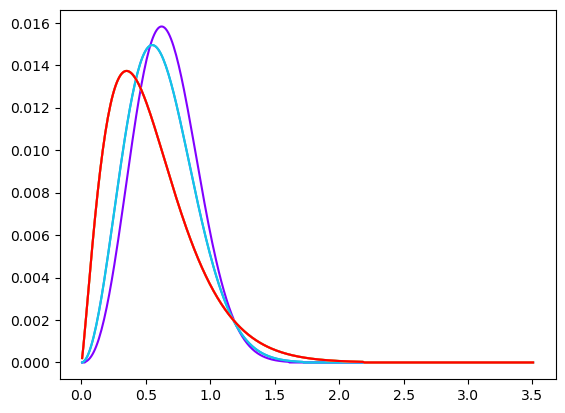

In [17]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 8))
for it in range(8):
    plt.plot(z, p_i[:,it]/p_i[:,it].sum(), color=colors[it], ls='-')
plt.show() 

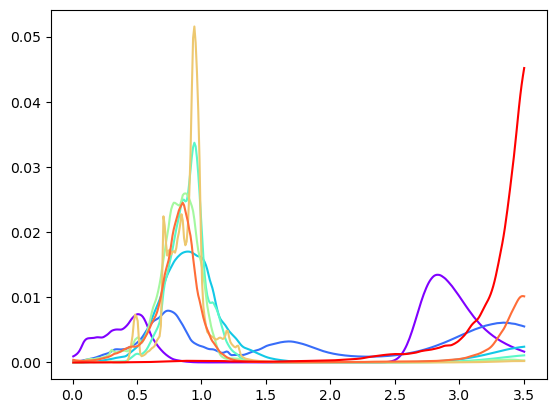

In [18]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 8))
for it in range(8):
    plt.plot(z, p[:,it]/p[:,it].sum(), color=colors[it], ls='-')
plt.show() 

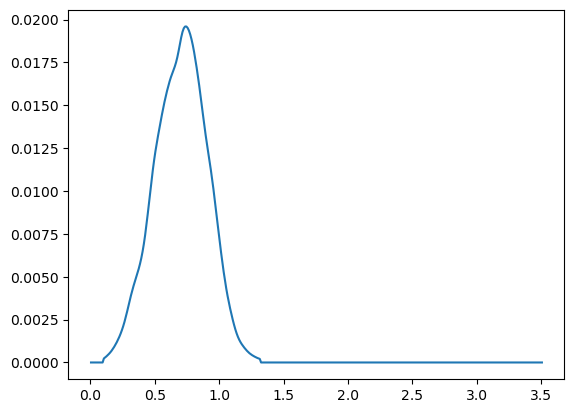

In [19]:
plt.plot(z, p_bayes)

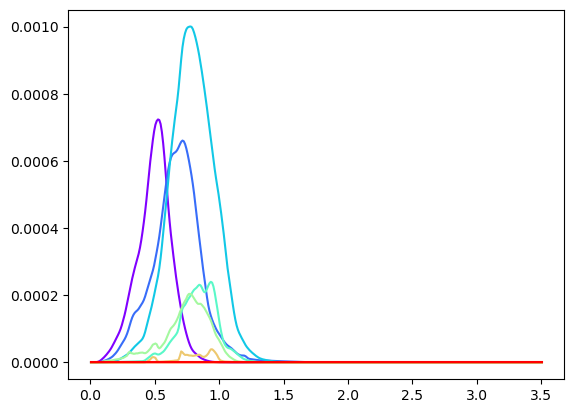

In [20]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 8))
for it in range(8):
    #plt.plot(z, pb[:,it]/pb[:,it].sum(), color=colors[it], ls='-')
    plt.plot(z, pb[:,it], color=colors[it], ls='-')
plt.show() 

In [ ]:
#python ~/repos/CSPZ/scripts/bpztilerun_template.py --tilename 0 --spectra CWWSB4.list --prior hdfn_gen --OutPath /scratch/midway2/raulteixeira/CosmicShearData/tile_0/pzout_0.h5

In [ ]:
C --prior hdfn_gen --OutPath /scratch/midway2/raulteixeira/CosmicShearData/tile_0/pzout_0.h5

In [41]:
f_obs.shape

(4,)

In [11]:
f_obs.shape

(1086842, 4)

In [13]:
np.median(f_obs, axis=0)

array([ 519.33806973, 1164.68192041, 1897.93791738, 2572.75264609])

In [15]:
np.median(f_mod, axis=[0,1])

array([2.16297507e-11, 2.90038067e-11, 3.93485234e-11, 4.82273070e-11])

In [12]:
f_mod.shape

(351, 8, 4)

ValueError: 'x' and 'y' must have the same size

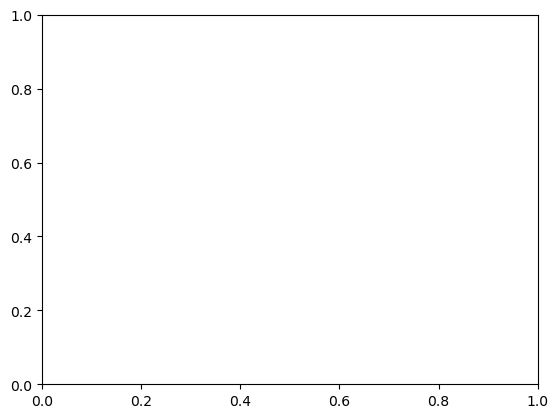

In [21]:
iz_b = np.argmax(p_bayes)
it_b = np.argmax(pb[iz_b,:])


plt.errorbar(np.arange(4), f_obs, yerr=ef_obs, fmt="+")
plt.plot(np.arange(4), f_mod[iz_b,it_b]*35, marker='o', ls='none', ms=5, )
plt.yscale('log')
plt.show()

In [50]:
print(f_obs)

[6.85363988e-10 8.58596749e-10 1.06731746e-09 1.13327570e-09]


In [24]:
import pandas as pd
import h5py

In [37]:
f = h5py.File('/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/test_BPZ_BDF_HDFN_CWWSB4_1e2.h5')

In [38]:
df = pd.DataFrame()
for key in f.keys():
    df[key]=np.array(f[key])

(array([ 8.,  8.,  7., 10., 14., 20.,  9., 10., 10.,  1.,  2.,  0.,  0.,
         0.,  1.]),
 array([0.095, 0.179, 0.263, 0.347, 0.431, 0.515, 0.599, 0.683, 0.767,
        0.851, 0.935, 1.019, 1.103, 1.187, 1.271, 1.355], dtype=float32),
 <BarContainer object of 15 artists>)

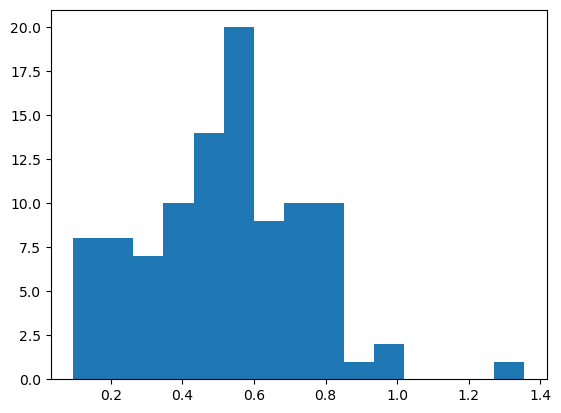

In [45]:
plt.hist(df['Z_SAMP'], bins=15)